<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [4]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width',"species"]
df.dropna(how="all",inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 3: Visualize the Data
---

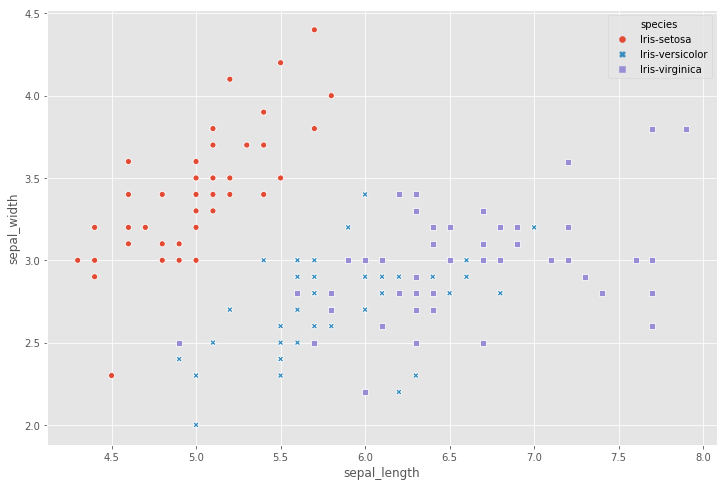

In [7]:
sns.scatterplot(x=df.sepal_length, y=df.sepal_width,hue=df.species,style=df.species)

### Task 4: Standardize the Data
---

In [8]:
x=df.iloc[:,0:4].values
y=df.species.values

In [9]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(x)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [10]:
co_mat=np.cov(X.T)
print("Covariance Matrix is given below: \n",co_mat)

Covariance Matrix is given below: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [11]:
eigen_values, eig_vect=np.linalg.eig(co_mat)

In [12]:
print("Eigen Vectors: \n ",eig_vect, "\n")
print("Eigen Values: \n ",eigen_values)

Eigen Vectors: 
  [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen Values: 
  [2.93035378 0.92740362 0.14834223 0.02074601]


### Task 6: Singular Value Decomposition (SVD)
---

In [13]:
eig_vec_svd,s,v=np.linalg.svd(X.T)
eig_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [14]:
for val in eigen_values:
    print(val)

2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


In [15]:
var_exp=[(i/sum(eigen_values))*100 for i in eigen_values]
var_exp

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]

In [16]:
cumul_var_exp=np.cumsum(var_exp)
cumul_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

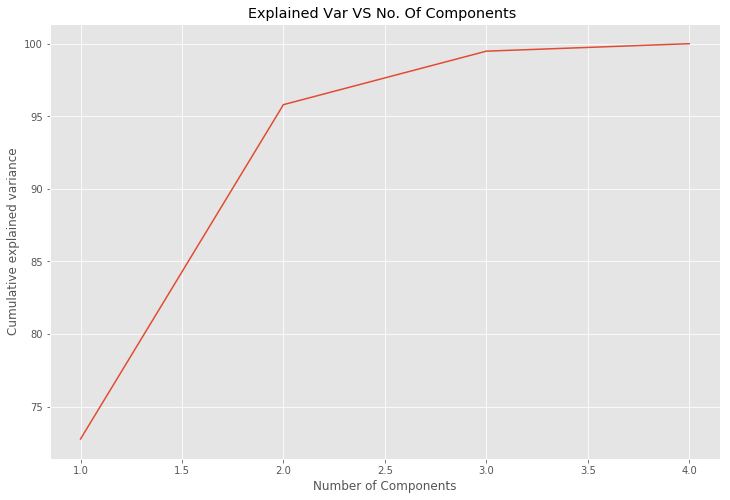

In [17]:
sns.lineplot(x=[1,2,3,4], y=cumul_var_exp)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Var VS No. Of Components ")
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [18]:
eig_vect

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [19]:
project_mat=(eig_vect.T[:][:])[:2].T

In [20]:
print(project_mat)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [21]:
x_pca=X.dot(project_mat)

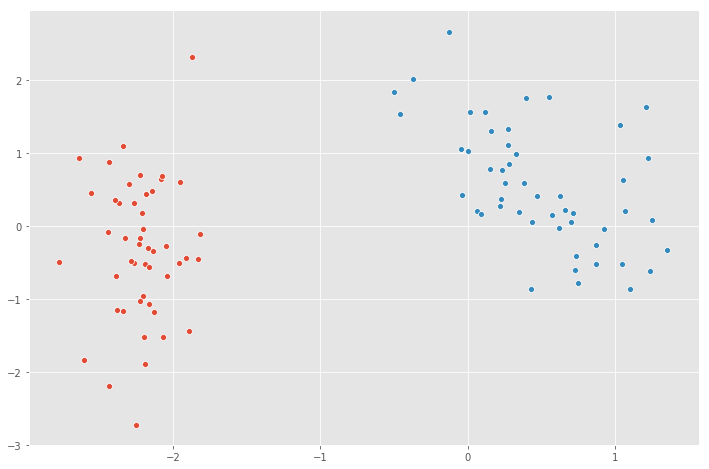

In [24]:
for species in ('Iris-setosa','Iris-versicolor','Iris-verginica'):
    sns.scatterplot(x_pca[y==species,0],x_pca[y==species,1])